In [15]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [64]:
im = cv2.imread('photo.png')
im = np.dstack([im[:,:,2], im[:,:,1], im[:,:,0]])

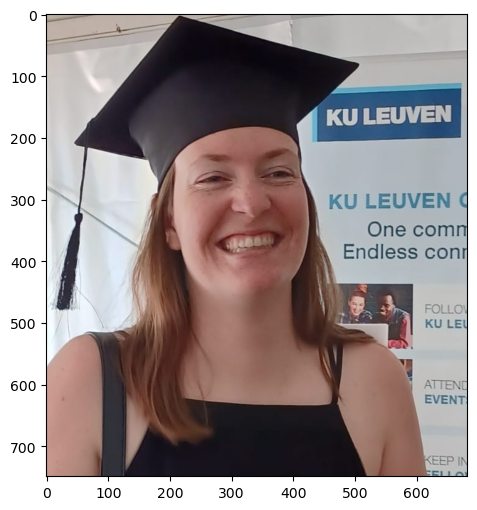

In [65]:
plt.figure(figsize=(6, 6))
ax = plt.imshow(im)  # Display the first channel (red in this case)




In [66]:
out = []
avg_color = []

cs = 10

for x in range(0, im.shape[1]-cs, cs):
    for y in range(0, im.shape[0]-cs, cs):
        r = np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 0]))
        g = np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 1]))
        b = np.sort(np.ndarray.flatten(im[y:y+cs, x:x+cs, 2]))

        punch = np.concatenate((r,g,b))

        if punch.mean() < 250: 
            out.append(punch)
            avg_color.append([r.mean(), g.mean(), b.mean()])

In [67]:
out = np.vstack((out))
avg_color = np.array(avg_color)

In [68]:
out.shape

(5025, 300)

In [82]:
res = TSNE(perplexity = 30, random_state = 2).fit_transform(out)

In [83]:
res

array([[ 13.595176 ,  10.770164 ],
       [  7.5712996,  16.031483 ],
       [ 20.179226 ,  23.709248 ],
       ...,
       [ 25.406319 , -19.022926 ],
       [ 16.504658 ,  -5.034658 ],
       [ 26.452246 , -19.843678 ]], dtype=float32)

In [84]:
res.shape

(5025, 2)

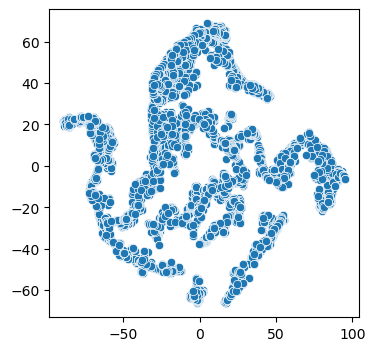

In [85]:
plt.figure(figsize = (4,4))
ax = sns.scatterplot(x = res[:,0], y = res[:,1])

In [86]:
avg_color = avg_color/255
avg_color = [tuple(x) for x in avg_color]
avg_color

TypeError: unsupported operand type(s) for /: 'list' and 'int'

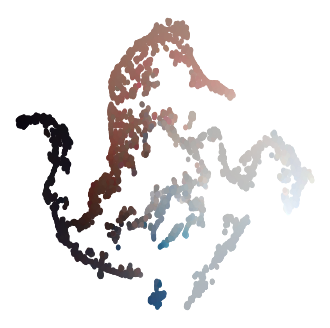

In [88]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

# Plot circles
for x in range(0, len(res)):
    patch = Circle((res[x][0], res[x][1]), 1, color=avg_color[x])
    ax.add_patch(patch)

# Set limits
plt.xlim(res[:, 0].min() - 5, res[:, 0].max() + 5)
plt.ylim(res[:, 1].min() - 5, res[:, 1].max() + 5)

# Remove axes and frame
ax.axis('off')

# Save the plot without frame and axes
plt.savefig('tsne_photo.png', bbox_inches='tight', pad_inches=0, transparent=True)

# Optionally, if you want to display the plot as well
plt.show()
